In [ ]:

import pandas as pd
# Import the required libraries
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')
# Read the CSV file into a Pandas DataFrame
csv_file = '/content/drive/MyDrive/train.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import pandas as pd  # You need to import pandas to read the CSV file


# Create an empty list to store images and labels
data = []

# Iterate through the CSV file and load images from Google Drive
for index, row in df.iterrows():
    filename = row['Filename']  # Adjust the column name as per your CSV
    class_label = row['Label']  # Adjust the column name as per your CSV

    image_path = '/content/drive/MyDrive/train/' + filename  # Update the path

    image = cv2.imread(image_path)

    # Check if the image is not None
    if image is not None:
        image = cv2.resize(image, (224, 224))
        data.append((image, class_label))

# Convert the data list to NumPy arrays
data = np.array(data, dtype=object)

# Separate the features and labels
X = np.array(data[:, 0].tolist())
y = np.array(data[:, 1])

In [ ]:

from sklearn.preprocessing import OneHotEncoder

# Assuming you have a list or NumPy array 'y' containing your class labels

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the class labels
Y= encoder.fit_transform(y.reshape(-1, 1))

# 'y_encoded' now contains the one-hot encoded labels
Y.shape


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(7560, 4)

In [ ]:
#custom model image extraction
import os
import pandas as pd
from PIL import Image
import numpy as np


csv_file_path = '/content/drive/MyDrive/train.csv'

# Load CSV data
data = pd.read_csv(csv_file_path)

# Lists to store image data and labels
X = []  # Images
Y = []  # Labels

# Download and process images
for index, row in data.iterrows():
    image_filename = os.path.join('/content/drive/MyDrive/train', row['Filename'])

    # Open and process the image
    image = Image.open(image_filename)
    image = image.resize((128, 128))  # Resize as needed
    image_array = np.array(image)

    # Append image and label to lists
    X.append(image_array)
    Y.append(row['Label'])

# Convert X to a NumPy array
X = np.array(X)

# Perform one-hot encoding on Y if needed

# Model building and training can follow the previous guidelines

# Remember to authenticate and access Google Drive before running this code.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


encoder = OneHotEncoder(sparse=False)

# Reshape 'Y' to be a 2D array (required by the encoder)
Y = np.array(Y).reshape(-1, 1)

# Fit and transform the labels using one-hot encoding
Y = encoder.fit_transform(Y)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
Y.shape


(7560, 4)

In [ ]:
from sklearn.model_selection import train_test_split

# X is your image data, and Y is your one-hot encoded labels

# Split the dataset into training (70%) and the rest (30%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Split the remaining data into validation (20%) and test (10%)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (5292, 128, 128, 3)
Y_train shape: (5292, 4)
X_val shape: (1512, 128, 128, 3)
Y_val shape: (1512, 4)
X_test shape: (756, 128, 128, 3)
Y_test shape: (756, 4)


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# Add a max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(16, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the model
model.add(Flatten())

# Add a dense layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Add the output layer with 4 classes and softmax activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])






In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,        # Shear angle in radians
    zoom_range=0.2,         # Randomly zoom images by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill mode for pixel values outside the boundary
)

# Fit the ImageDataGenerator to your training data
datagen.fit(X_train)  # Assuming X_train is your training data

# Generate augmented data
augmented_data = datagen.flow(X_train, Y_train, batch_size=32)




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=10,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights to the point where validation loss was minimized
)

In [ ]:
history = model.fit(augmented_data, batch_size=32, epochs=50, validation_data=(X_val, Y_val),callbacks=[early_stopping])


Epoch 1/50
166/166 [==============================] - 28s 160ms/step - loss: 14.0622 - accuracy: 0.5726 - val_loss: 0.9831 - val_accuracy: 0.6343
Epoch 2/50
166/166 [==============================] - 23s 136ms/step - loss: 0.9087 - accuracy: 0.6413 - val_loss: 0.9736 - val_accuracy: 0.6343
Epoch 3/50
166/166 [==============================] - 23s 141ms/step - loss: 1.0372 - accuracy: 0.6094 - val_loss: 1.0334 - val_accuracy: 0.6151
Epoch 4/50
166/166 [==============================] - 25s 149ms/step - loss: 0.9902 - accuracy: 0.6249 - val_loss: 1.0485 - val_accuracy: 0.5979
Epoch 5/50
166/166 [==============================] - 23s 138ms/step - loss: 0.9959 - accuracy: 0.6243 - val_loss: 1.0979 - val_accuracy: 0.6310
Epoch 6/50
166/166 [==============================] - 26s 154ms/step - loss: 1.0421 - accuracy: 0.5884 - val_loss: 1.1903 - val_accuracy: 0.4563
Epoch 7/50
166/166 [==============================] - 22s 135ms/step - loss: 1.1570 - accuracy: 0.4849 - val_loss: 1.1700 - val_a

In [ ]:
from tensorflow.keras.models import load_model, save_model

# Assuming you have a trained model named 'model'
# Train your model before saving it

# Save the model to an HDF5 file
model.save('custom.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model from the saved file
loaded_model = load_model('custom.h5')

In [ ]:
history = loaded_model.fit(augmented_data, batch_size=32, epochs=20, validation_data=(X_val, Y_val),callbacks=[early_stopping])

Epoch 1/20
166/166 [==============================] - 26s 153ms/step - loss: 0.7472 - accuracy: 0.7254 - val_loss: 0.6984 - val_accuracy: 0.7421
Epoch 2/20
166/166 [==============================] - 22s 134ms/step - loss: 0.7301 - accuracy: 0.7277 - val_loss: 0.7467 - val_accuracy: 0.7196
Epoch 3/20
166/166 [==============================] - 25s 149ms/step - loss: 0.7303 - accuracy: 0.7226 - val_loss: 0.7364 - val_accuracy: 0.7196
Epoch 4/20
166/166 [==============================] - 22s 134ms/step - loss: 0.7079 - accuracy: 0.7349 - val_loss: 0.7744 - val_accuracy: 0.7063
Epoch 5/20
166/166 [==============================] - 24s 143ms/step - loss: 0.6930 - accuracy: 0.7389 - val_loss: 0.6866 - val_accuracy: 0.7474
Epoch 6/20
166/166 [==============================] - 22s 136ms/step - loss: 0.6632 - accuracy: 0.7526 - val_loss: 0.5981 - val_accuracy: 0.7718
Epoch 7/20
166/166 [==============================] - 25s 152ms/step - loss: 0.6247 - accuracy: 0.7731 - val_loss: 0.6314 - val_ac

In [ ]:
from tensorflow.keras.models import load_model, save_model

# Assuming you have a trained model named 'model'
# Train your model before saving it

# Save the model to an HDF5 file
loaded_model.save('custom1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model from the saved file
loaded_model = load_model('custom1.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
checkpoint_filepath = 'model_checkpoint.h5'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
csv_logger = CSVLogger('training_metrices.csv')

# Train the model with callbacks
history = loaded_model.fit(augmented_data, batch_size=32, epochs=20, validation_data=(X_val, Y_val), callbacks=[model_checkpoint_callback, csv_logger])

Epoch 1/20
166/166 [==============================] - 30s 170ms/step - loss: 0.4421 - accuracy: 0.8328 - val_loss: 0.4884 - val_accuracy: 0.8214
Epoch 2/20
166/166 [==============================] - 25s 152ms/step - loss: 0.4153 - accuracy: 0.8452 - val_loss: 0.3937 - val_accuracy: 0.8552
Epoch 3/20
166/166 [==============================] - 27s 162ms/step - loss: 0.4595 - accuracy: 0.8301 - val_loss: 0.4321 - val_accuracy: 0.8333
Epoch 4/20
166/166 [==============================] - 24s 144ms/step - loss: 0.4384 - accuracy: 0.8398 - val_loss: 0.4310 - val_accuracy: 0.8340
Epoch 5/20
166/166 [==============================] - 25s 153ms/step - loss: 0.4466 - accuracy: 0.8299 - val_loss: 0.4016 - val_accuracy: 0.8479
Epoch 6/20
166/166 [==============================] - 23s 137ms/step - loss: 0.4250 - accuracy: 0.8358 - val_loss: 0.4568 - val_accuracy: 0.8353
Epoch 7/20
166/166 [==============================] - 25s 152ms/step - loss: 0.4116 - accuracy: 0.8452 - val_loss: 0.4161 - val_ac

In [ ]:
from tensorflow.keras.models import load_model, save_model

# Assuming you have a trained model named 'model'
# Train your model before saving it

# Save the model to an HDF5 file
model.save('custompre.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = load_model('custompre.h5')

In [ ]:
history = loaded_model.fit(augmented_data, batch_size=32, epochs=10, validation_data=(X_val, Y_val),callbacks=[early_stopping])


Epoch 1/10
166/166 [==============================] - 26s 151ms/step - loss: 0.6813 - accuracy: 0.7511 - val_loss: 0.6986 - val_accuracy: 0.7282
Epoch 2/10
166/166 [==============================] - 22s 135ms/step - loss: 0.6696 - accuracy: 0.7496 - val_loss: 0.6928 - val_accuracy: 0.7302
Epoch 3/10
166/166 [==============================] - 22s 136ms/step - loss: 0.6173 - accuracy: 0.7702 - val_loss: 0.5452 - val_accuracy: 0.7877
Epoch 4/10
166/166 [==============================] - 25s 149ms/step - loss: 0.5597 - accuracy: 0.7948 - val_loss: 0.6384 - val_accuracy: 0.7679
Epoch 5/10
166/166 [==============================] - 23s 140ms/step - loss: 0.5779 - accuracy: 0.7893 - val_loss: 0.5498 - val_accuracy: 0.7877
Epoch 6/10
166/166 [==============================] - 22s 134ms/step - loss: 0.5534 - accuracy: 0.7846 - val_loss: 0.5417 - val_accuracy: 0.8003
Epoch 7/10
166/166 [==============================] - 26s 154ms/step - loss: 0.5300 - accuracy: 0.8048 - val_loss: 0.4741 - val_ac

In [ ]:
# Assuming you have your training data (X_train and Y_train) and validation data (X_val and Y_val) ready

# Compile the loaded model (if you haven't already)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the loaded model
history = loaded_model.fit(augmented_data, batch_size=50, epochs=50, validation_data=(X_val, Y_val),callbacks=[early_stopping])


Epoch 1/50
166/166 [==============================] - 23s 128ms/step - loss: 0.5950 - accuracy: 0.7812 - val_loss: 0.6207 - val_accuracy: 0.7745
Epoch 2/50
166/166 [==============================] - 24s 146ms/step - loss: 0.6150 - accuracy: 0.7774 - val_loss: 0.5877 - val_accuracy: 0.7864
Epoch 3/50
166/166 [==============================] - 22s 130ms/step - loss: 0.5763 - accuracy: 0.7884 - val_loss: 0.5728 - val_accuracy: 0.7864
Epoch 4/50
166/166 [==============================] - 25s 150ms/step - loss: 0.5583 - accuracy: 0.7925 - val_loss: 0.5788 - val_accuracy: 0.7831
Epoch 5/50
166/166 [==============================] - 25s 151ms/step - loss: 0.5606 - accuracy: 0.7925 - val_loss: 0.5659 - val_accuracy: 0.8049
Epoch 6/50
166/166 [==============================] - 28s 166ms/step - loss: 0.5343 - accuracy: 0.7984 - val_loss: 0.5230 - val_accuracy: 0.8036
Epoch 7/50
166/166 [==============================] - 25s 149ms/step - loss: 0.5642 - accuracy: 0.7933 - val_loss: 0.5231 - val_ac

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values you provided
accuracy = [0.7812, 0.7774, 0.7884, 0.7925, 0.7925, 0.7984, 0.7933, 0.7952, 0.8037, 0.8029, 0.7961, 0.8103,
            0.8057, 0.8059, 0.8146, 0.8071, 0.8158, 0.8108, 0.8192, 0.8218, 0.8122, 0.8105, 0.8161,
            0.8195, 0.8167, 0.8280, 0.8141, 0.8224, 0.8245, 0.8307, 0.8286, 0.8360, 0.8280,
            0.8245, 0.8271, 0.8316, 0.8199, 0.8207, 0.8362, 0.8416, 0.8392]
val_accuracy = [0.7745, 0.7864, 0.7864, 0.7831, 0.8049, 0.8036, 0.8122, 0.8069, 0.7811, 0.7685,
                0.7811, 0.8228, 0.7897, 0.8056, 0.8095, 0.7811, 0.8168, 0.8241, 0.7837, 0.7427, 0.8347,
                0.7996, 0.7837, 0.7950, 0.8347, 0.8459, 0.8347, 0.8380, 0.8327, 0.8194, 0.8472, 0.7837,
                0.8499, 0.8056, 0.8307, 0.8386, 0.8340, 0.8439, 0.8552, 0.8419, 0.8485]
loss = [0.5950,0.6150, 0.5763, 0.5583, 0.5606, 0.5343, 0.5642, 0.5488, 0.5382, 0.5375, 0.5508,
        0.5108, 0.5354, 0.5269, 0.5261, 0.5009, 0.5055, 0.4913, 0.6156, 0.6723, 0.4562, 0.5128,
        0.5071, 0.4823, 0.4947, 0.4656, 0.4928, 0.4785, 0.4751, 0.4564, 0.4621, 0.4582, 0.4721,
        0.4886, 0.4780, 0.4622, 0.4922, 0.4892, 0.4394, 0.4359, 0.4489]
val_loss = [0.6207, 0.5877, 0.5728, 0.5788, 0.5659, 0.5230, 0.5231, 0.5161, 0.6094,
            0.6297, 0.5435, 0.4707, 0.5485, 0.5404, 0.5277, 0.5544, 0.5057, 0.4933,
            0.6156, 0.6723, 0.4562, 0.5661, 0.4748, 0.5531, 0.4443, 0.4233, 0.4472,
            0.4565, 0.4340, 0.5314, 0.4155, 0.5615, 0.4200, 0.5134, 0.4676, 0.4180, 0.4453,0.4419,0.4255,0.4320,0.4257]

# Create arrays for epochs
epochs = list(range(1,42))

print("Length of epochs:", len(epochs))
print("Length of train_loss:", len(loss))
print("Length of valid_loss:", len(val_loss))
print("Length of train_accuracy:", len(accuracy))
print("Length of valid_accuracy:", len(val_accuracy))



Length of epochs: 41
Length of train_loss: 41
Length of valid_loss: 41
Length of train_accuracy: 41
Length of valid_accuracy: 41


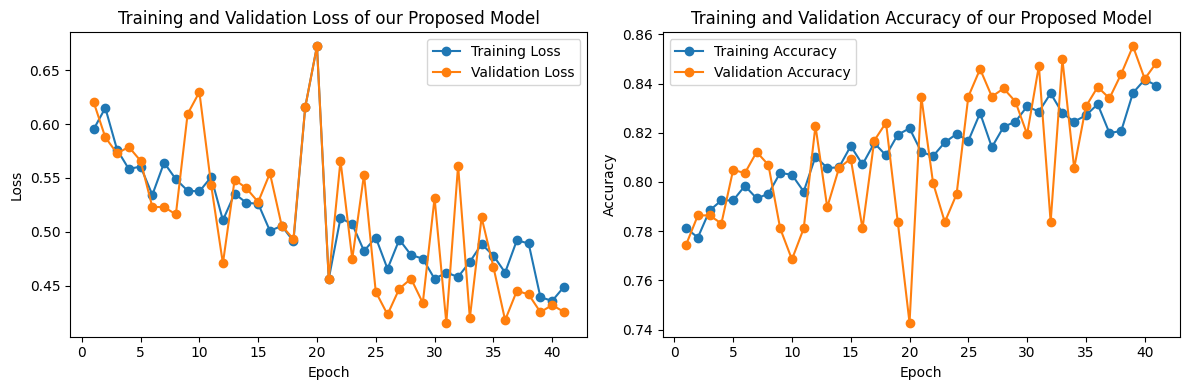

In [ ]:
# Plotting
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs,loss, label='Training Loss', marker='o')
plt.plot(epochs,val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of our Proposed Model')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs,accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of our Proposed Model')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model, save_model

# Assuming you have a trained model named 'model'
# Train your model before saving it

# Save the model to an HDF5 file
model.save('custom3.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = load_model('custompre.h5')


In [ ]:
# Assuming you have a trained model named 'model' and test data 'X_test'

# Import necessary libraries
import numpy as np

# Make predictions on the test data
predictions = loaded_model.predict(X_test)

# 'predictions' will contain the model's predictions for each input in X_test
# It will typically be a probability distribution over the classes (if it's a classification problem)

# If you want to get the predicted class labels (for classification tasks), you can use argmax:
predicted_labels = np.argmax(predictions, axis=1)

# 'predicted_labels' will contain the predicted class labels for each input in X_test

# You can use 'predicted_labels' for further analysis or evaluation of your model's performance


24/24 [==============================] - 0s 3ms/step


In [ ]:
import numpy as np

# Assuming 'Y_test' is a 2D array with shape (num_samples, num_classes)
# 'predicted_labels' is a 1D array with shape (num_samples,)

# Get the number of samples and number of classes
num_samples, num_classes = Y_test.shape

# Create a 2D array filled with zeros to match the shape of Y_test
predicted_labels_2d = np.zeros((num_samples, num_classes))

# Set the predicted class labels in the appropriate columns
for i in range(num_samples):
    predicted_labels_2d[i, predicted_labels[i]] = 1

# 'predicted_labels_2d' is now a 2D array with the same shape as 'Y_test'



In [ ]:
print(predicted_labels_2d.shape)
print(Y_test.shape)


(756, 4)
(756, 4)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, predicted_labels_2d, average='micro')
recall = recall_score(Y_test, predicted_labels_2d, average='micro')
f1 = f1_score(Y_test, predicted_labels_2d, average='micro')

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Precision: 0.7937
Recall: 0.7937
F1 Score: 0.7937


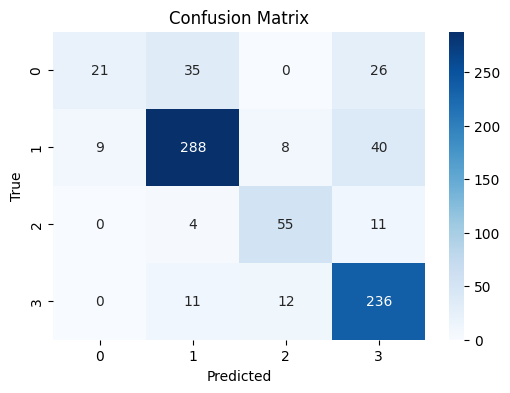

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Y_test_single = np.argmax(Y_test, axis=1)
predicted_labels_single = np.argmax(predicted_labels_2d, axis=1)

# Generate confusion matrix
cm = confusion_matrix(Y_test_single, predicted_labels_single)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# resnet start
from sklearn.model_selection import train_test_split

# Assuming you have X (images) and Y (labels) as lists or NumPy arrays
# X should be a list or array of images, and Y should be a list or array of labels

# Split the data into training (70%) and the rest (30%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Split the remaining data into validation (20%) and test (10%)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42)

# Now you have X_train, Y_train, X_val, Y_val, X_test, and Y_test


In [ ]:
Y_train.shape


(5292, 4)

In [ ]:
import os

# Define the path to the model file you want to delete
model_file_path = "resnet1.h5"

# Check if the model file exists before attempting to delete it
if os.path.exists(model_file_path):
    os.remove(model_file_path)
    print(f"The model file '{model_file_path}' has been deleted.")
else:
    print(f"The model file '{model_file_path}' does not exist.")


The model file 'resnet1.h5' does not exist.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the ResNet-50 base model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for your specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # num_classes is the number of classes in your dataset

# Create the custom model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an appropriate loss function and optimizer
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

# Define model checkpoint callback to save the best model
#model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

# Data Augmentation for X_train
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)  # X_train is your training dataset

'''# Train the model using data augmentation and early stopping
model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,  # You can adjust the number of epochs as needed
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, model_checkpoint]
)

# Optionally, you can unfreeze some of the layers in the pre-trained model for fine-tuning.
# for layer in base_model.layers:
#     layer.trainable = True
'''

94765736/94765736 [==============================] - 0s 0us/step


'# Train the model using data augmentation and early stopping\nmodel.fit(\n    datagen.flow(X_train, Y_train, batch_size=32),\n    steps_per_epoch=len(X_train) // 32,\n    epochs=50,  # You can adjust the number of epochs as needed\n    validation_data=(X_val, Y_val),\n    callbacks=[early_stopping, model_checkpoint]\n)\n\n# Optionally, you can unfreeze some of the layers in the pre-trained model for fine-tuning.\n# for layer in base_model.layers:\n#     layer.trainable = True\n'

In [ ]:

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=5,  # You can adjust the number of epochs as needed
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping]
)

In [ ]:
history=model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,  # You can adjust the number of epochs as needed
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
165/165 [==============================] - ETA: 0s - loss: 0.5318 - accuracy: 0.8194

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


165/165 [==============================] - 95s 490ms/step - loss: 0.5318 - accuracy: 0.8194 - val_loss: 0.5515 - val_accuracy: 0.7659
Epoch 2/50
165/165 [==============================] - 82s 498ms/step - loss: 0.3416 - accuracy: 0.8702 - val_loss: 0.3781 - val_accuracy: 0.8690
Epoch 3/50
165/165 [==============================] - 78s 476ms/step - loss: 0.3044 - accuracy: 0.8846 - val_loss: 0.3103 - val_accuracy: 0.8823
Epoch 4/50
165/165 [==============================] - 83s 503ms/step - loss: 0.2822 - accuracy: 0.8933 - val_loss: 0.2990 - val_accuracy: 0.8829
Epoch 5/50
165/165 [==============================] - 80s 483ms/step - loss: 0.2741 - accuracy: 0.8990 - val_loss: 0.2751 - val_accuracy: 0.8929
Epoch 6/50
165/165 [==============================] - 81s 490ms/step - loss: 0.2427 - accuracy: 0.9105 - val_loss: 0.2473 - val_accuracy: 0.9028
Epoch 7/50
165/165 [==============================] - 82s 496ms/step - loss: 0.2357 - accuracy: 0.9129 - val_loss: 0.2161 - val_accuracy: 0.9

In [ ]:
history=model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,  # You can adjust the number of epochs as needed
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
165/165 [==============================] - ETA: 0s - loss: 0.5761 - accuracy: 0.8156

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


165/165 [==============================] - 87s 495ms/step - loss: 0.5761 - accuracy: 0.8156 - val_loss: 0.4016 - val_accuracy: 0.8413
Epoch 2/50
165/165 [==============================] - 82s 497ms/step - loss: 0.3387 - accuracy: 0.8713 - val_loss: 0.3774 - val_accuracy: 0.8459
Epoch 3/50
165/165 [==============================] - 78s 472ms/step - loss: 0.3063 - accuracy: 0.8749 - val_loss: 0.3203 - val_accuracy: 0.8717
Epoch 4/50
165/165 [==============================] - 78s 472ms/step - loss: 0.2844 - accuracy: 0.8905 - val_loss: 0.2407 - val_accuracy: 0.9067
Epoch 5/50
165/165 [==============================] - 77s 466ms/step - loss: 0.2623 - accuracy: 0.8998 - val_loss: 0.2501 - val_accuracy: 0.9015
Epoch 6/50
165/165 [==============================] - 78s 476ms/step - loss: 0.2425 - accuracy: 0.9059 - val_loss: 0.2353 - val_accuracy: 0.9067
Epoch 7/50
165/165 [==============================] - 77s 465ms/step - loss: 0.2507 - accuracy: 0.9114 - val_loss: 0.2670 - val_accuracy: 0.9

In [ ]:
# Define the path where you want to save the model in Google Drive
model_path_in_drive = '/content/drive/My Drive/best_model.h5'

# Save the model to Google Drive
model.save(model_path_in_drive)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model from Google Drive
loaded_model = tf.keras.models.load_model(model_path_in_drive)


In [ ]:
import numpy as np

# Assuming X_test contains your test data and Y_test contains the ground truth labels
# Ensure that both X_test and Y_test are prepared correctly

# Make predictions
predictions = model.predict(X_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

24/24 [==============================] - 5s 112ms/step


In [ ]:
import numpy as np

# Assuming Y_test is a 2D array of shape (num_samples, num_classes)
# predicted_labels is a 1D array with class indices (shape: num_samples,)

# Create an empty 2D array for predicted labels
predicted_labels_2d = np.zeros(Y_test.shape, dtype=int)

# Fill the predicted_labels_2d array based on the class indices
for i in range(len(predicted_labels)):
    predicted_labels_2d[i, predicted_labels[i]] = 1

# Now, predicted_labels_2d is a 2D binary array with one-hot encoding

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, predicted_labels_2d, average='weighted')
recall = recall_score(Y_test, predicted_labels_2d, average='weighted')
f1 = f1_score(Y_test, predicted_labels_2d, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9485858480376025
Recall: 0.9484126984126984
F1 Score: 0.9484463922015611


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, predicted_labels_2d, average='weighted')
recall = recall_score(Y_test, predicted_labels_2d, average='weighted')
f1 = f1_score(Y_test, predicted_labels_2d, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9630408089111026
Recall: 0.9616402116402116
F1 Score: 0.961883730337223


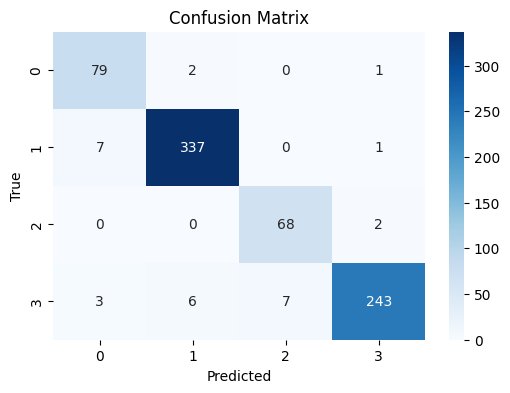

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Y_test_single = np.argmax(Y_test, axis=1)
predicted_labels_single = np.argmax(predicted_labels_2d, axis=1)

# Generate confusion matrix
cm = confusion_matrix(Y_test_single, predicted_labels_single)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input



# Define the path to your test image folder
test_folder = '/content/drive/MyDrive/test'  # Replace with the actual path to your test folder

# Initialize lists to store image paths and predictions
image_paths = []
predictions = []

# Iterate through the files in the test folder
for file_name in os.listdir(test_folder):
    if file_name.endswith(('.png')):  # Adjust file extensions as needed
        # Load and preprocess the image
        img_path = os.path.join(test_folder, file_name)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Make predictions using your trained model
        prediction = model.predict(x)

        # Get the class label with the highest probability
        predicted_label = np.argmax(prediction)

        image_paths.append(img_path)
        predictions.append(predicted_label)

# Print image paths and their predicted labels
for img_path, prediction in zip(image_paths, predictions):
    print(f"Image: {img_path} - Predicted Label: {prediction}")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
Image: /content/drive/MyDrive/test/14148.png - Predicted Label: 3
Image: /content/drive/MyDrive/test/14114.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/14161.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/14085.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/14006.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/14115.png - Predicted Label: 3
Image: /content/drive/MyDrive/test/13981.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/14166.png - Predicted Label: 2
Image: /content/drive/MyDrive/test/13917.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/13929.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/13908.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/13949.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/14076.png - Predicted Label: 1
Image: /content/drive/MyDrive/test/1407

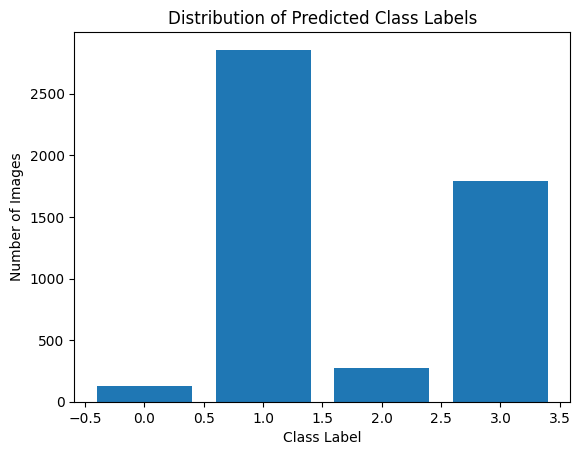

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace predicted_labels with your actual predicted labels
predicted_labels = np.array(predictions)

# Define the class labels
class_labels = [0, 1, 2, 3]

# Count the occurrences of each class label
label_counts = [np.sum(predicted_labels == label) for label in class_labels]

# Create a bar chart
plt.bar(class_labels, label_counts)

# Add labels and title
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Distribution of Predicted Class Labels')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Values you provided for 50 epochs
epochs = list(range(1, 51))
train_loss = [0.5318, 0.3416, 0.3044, 0.2822, 0.2741, 0.2427, 0.2357, 0.2304, 0.2246, 0.2200,
              0.2075, 0.2046, 0.1940, 0.1833, 0.1874, 0.1897, 0.1691, 0.1797, 0.1760, 0.1765,
              0.1772, 0.1602, 0.1578, 0.1677, 0.1660, 0.1580, 0.1468, 0.1502, 0.1445, 0.1473,
              0.1563, 0.1473, 0.1410, 0.1403, 0.1320, 0.1427, 0.1290, 0.1371, 0.1272, 0.1267,
              0.1258, 0.1349, 0.1167, 0.1176, 0.1218, 0.1287, 0.1166, 0.1188, 0.1157, 0.1168]

valid_loss = [0.5515, 0.3781, 0.3103, 0.2990, 0.2751, 0.2473, 0.2161, 0.2401, 0.2009, 0.2270,
              0.2451, 0.2028, 0.2088, 0.2878, 0.2440, 0.1990, 0.2010, 0.2309, 0.2824, 0.2027,
              0.1945, 0.1767, 0.2074, 0.2050, 0.2173, 0.2130, 0.1900, 0.2172, 0.2079, 0.2640,
              0.1829, 0.1793, 0.1921, 0.2141, 0.1667, 0.1650, 0.1721, 0.1817, 0.1712, 0.2152,
              0.1872, 0.1772, 0.2166, 0.1795, 0.1657, 0.1839, 0.2265, 0.1952, 0.2098, 0.1898]

train_accuracy = [0.8194, 0.8702, 0.8846, 0.8933, 0.8990, 0.9105, 0.9129, 0.9106, 0.9137, 0.9184,
                  0.9247, 0.9217, 0.9272, 0.9319, 0.9266, 0.9260, 0.9371, 0.9312, 0.9348, 0.9359,
                  0.9331, 0.9378, 0.9392, 0.9361, 0.9369, 0.9414, 0.9454, 0.9473, 0.9462, 0.9441,
                  0.9428, 0.9443, 0.9420, 0.9490, 0.9490, 0.9470, 0.9542, 0.9502, 0.9504, 0.9538,
                  0.9538, 0.9479, 0.9565, 0.9568, 0.9561, 0.9504, 0.9568, 0.9570, 0.9580, 0.9565]

valid_accuracy = [0.7659, 0.8690, 0.8823, 0.8829, 0.8929, 0.9028, 0.9173, 0.9087, 0.9233, 0.9101,
                  0.9101, 0.9220, 0.9173, 0.8975, 0.9127, 0.9266, 0.9319, 0.9206, 0.8929, 0.9292,
                  0.9259, 0.9306, 0.9259, 0.9266, 0.9213, 0.9266, 0.9306,0.9226,0.9306,0.8968, 0.9286,
                  0.9385, 0.9365, 0.9187, 0.9392, 0.9372, 0.9325, 0.9239, 0.9259, 0.9200, 0.9292,
                  0.9279, 0.9206, 0.9332, 0.9392, 0.9325, 0.9101, 0.9246, 0.9233, 0.9253]

print("Length of epochs:", len(epochs))
print("Length of train_loss:", len(train_loss))
print("Length of valid_loss:", len(valid_loss))
print("Length of train_accuracy:", len(train_accuracy))
print("Length of valid_accuracy:", len(valid_accuracy))


Length of epochs: 50
Length of train_loss: 50
Length of valid_loss: 50
Length of train_accuracy: 50
Length of valid_accuracy: 50


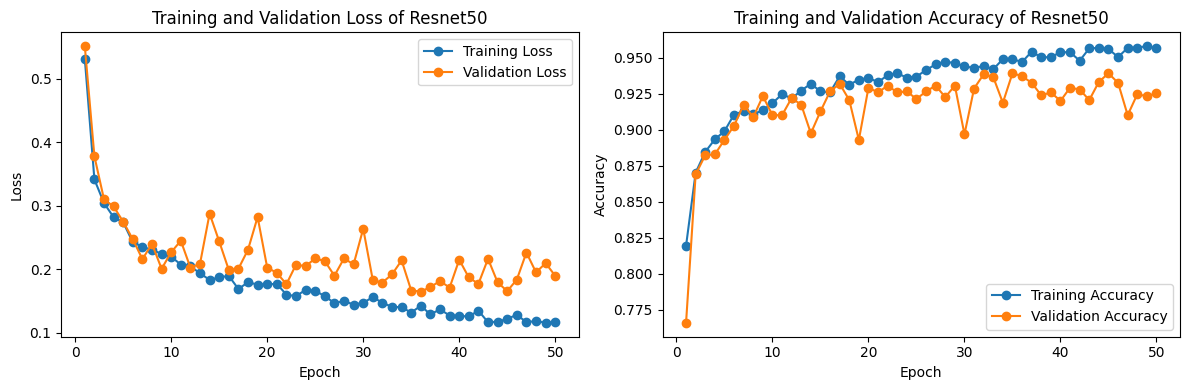

In [ ]:
# Plotting
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, valid_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of Resnet50')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, valid_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Resnet50')
plt.legend()

plt.tight_layout()
plt.show()
